In [1]:
import os, sys

ruta_raiz = os.path.abspath("..")
if ruta_raiz not in sys.path:
    sys.path.append(ruta_raiz)

In [ ]:
import numpy as np
import random
import torch
import torch.nn as nn
from collections import deque
from mpe2 import simple_tag_v3
import supersuit as ss
from NGUMultiAgent.NGUMulti import NGUMultiAgent
from NGU.DQN import DQN as NGU_DQN
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class FakeEnv:
    def __init__(self, observation_space, action_space):
        self.observation_space = observation_space
        self.action_space = action_space

In [ ]:
## Comment trainer.share_replay_buffer("adversary_0") if you want to run without shared replay buffer

seed = 42

base_params = dict(
    learning_rate = 0.001,
    buffer_size = 1000000,
    learning_starts = 5000,
    batch_size = 128,
    tau = 1.0,
    gamma = 0.99,
    train_freq = 16,
    gradient_steps = 4,
    target_update_interval = 2000,
    exploration_fraction = 0.1,
    exploration_initial_eps = 1,
    exploration_final_eps = 0.1,
    max_grad_norm = 10,
    verbose = 0
)

## Assign Beta values
beta_values = [0.0, 0.1, 0.2]

def run_agent(filename):
    env = simple_tag_v3.parallel_env(
        render_mode='rgb_array', 
        num_good=1, 
        num_adversaries=3, 
        num_obstacles=0, 
        max_cycles=150, 
        dynamic_rescaling=True
    )
    env.reset(seed=seed)
    agents = env.agents

    agent_dict = {}
    adversary_agents = [agent for agent in agents if agent.startswith("adversary")]
    
    for i, agent in enumerate(adversary_agents):
        agent_params = base_params.copy()
        agent_params['beta'] = beta_values[i % len(beta_values)]
        
        agent_dict[agent] = NGU_DQN(
            FakeEnv(env.observation_space(agent), env.action_space(agent)), 
            **agent_params
        )
   

    trainer = NGUMultiAgent(env, agent_dict, total_timesteps=200_000, log_interval=100)
    trainer.share_replay_buffer("adversary_0")  
    trainer.learn()
    trainer.save_rewards_to_csv(filename)
    trainer.plot_total_rewards()

Corriendo run 13
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 235
|    time_elapsed     | 63
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 10.50 | loss: 0.0017 | eps: 0.933
| adversary_1 -> mean_ep_rew | 10.50 | loss: 0.0015 | eps: 0.933
| adversary_2 -> mean_ep_rew | 10.50 | loss: 0.0761 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 207
|    time_elapsed     | 144
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 14.70 | loss: 0.0843 | eps: 0.865
| adversary_1 -> mean_ep_rew | 14.70 | loss: 0.0795 | eps: 0.865
| adversary_2 -> mean_ep_rew | 14.70 | loss: 0.2218 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
| 

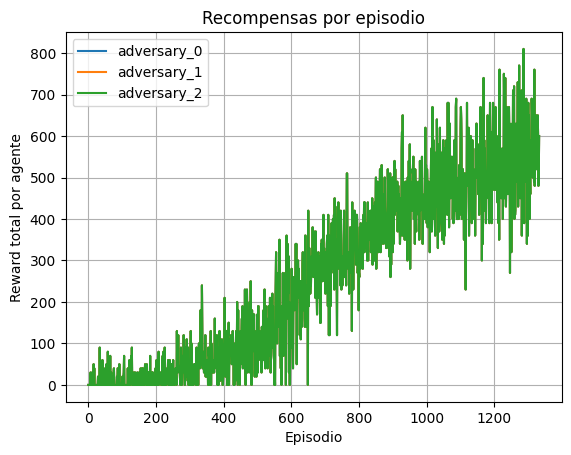

Corriendo run 14
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 278
|    time_elapsed     | 53
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 9.80 | loss: 0.0034 | eps: 0.933
| adversary_1 -> mean_ep_rew | 9.80 | loss: 0.0770 | eps: 0.933
| adversary_2 -> mean_ep_rew | 9.80 | loss: 0.0773 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 242
|    time_elapsed     | 123
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 12.80 | loss: 0.0766 | eps: 0.865
| adversary_1 -> mean_ep_rew | 12.80 | loss: 0.0114 | eps: 0.865
| adversary_2 -> mean_ep_rew | 12.80 | loss: 0.0159 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    

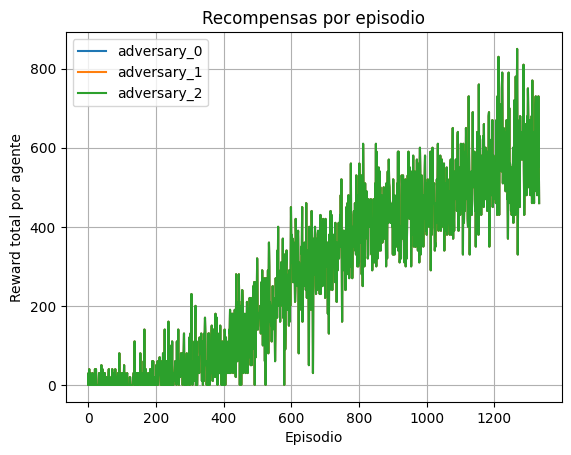

Corriendo run 15
----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 272
|    time_elapsed     | 55
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 11.90 | loss: 0.0041 | eps: 0.933
| adversary_1 -> mean_ep_rew | 11.90 | loss: 0.0780 | eps: 0.933
| adversary_2 -> mean_ep_rew | 11.90 | loss: 0.0015 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 238
|    time_elapsed     | 125
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 15.70 | loss: 0.2333 | eps: 0.865
| adversary_1 -> mean_ep_rew | 15.70 | loss: 0.0766 | eps: 0.865
| adversary_2 -> mean_ep_rew | 15.70 | loss: 0.1621 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
| 

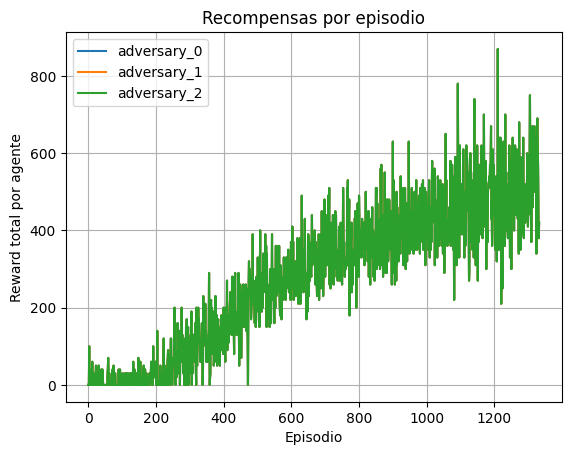

In [ ]:
for i in range(1, 16):
    print(f"Corriendo run {i}")
    run_agent(f"runs/shared_buffer_run_{i}.csv")